<a href="https://colab.research.google.com/github/skrofman/Applied-Machine-Learning/blob/master/DATA_310_Lecture_7_Spring_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA 310 Lecture 7 - Spring 2021

<font face="Chalkboard" color="darkgreen" size=5> Data Standardizations, Density Estimates, Linear Regression </font>

## <font color='navy'> Data Standardizations (Scaling the Data)</font>

Some of the most frequently used standardizations are 

  - z-scores: $\Large{\frac{x-\mu}{\sigma}}$ where $\mu$ is the mean and $\sigma$ is the standard deviation.
  - quantiles: every data point is replaced by its percentile within the feature column.
  - division by max: $\Large{\frac{x}{\max{(x)}}}.$
  - 0 to 1 scaling: $\Large{\frac{x-\min{(x)}}{\max{(x)}-\min{(x)}}}.$

<font color='red'> What we want is to have meaningful and comparable values across different features.</font>

Critical Thinking Question: What is the meaning of z-scores?

Answer: It represents a number of standard deviations above or below the mean of the random variable being scaled by z-scores. 

<font color='red'> IMPORTANT: z-Scores do not have physical units so we can combine z-scores from different features. </font>

<font color='green'>Chebyschev's Theorem: within k standard deviations around the mean we have at least $\left(1-\frac{1}{k^2}\right) \%$ of the population.</font>


In [ ]:
k = 5
(1-1/(k*k))*100


96.0

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
data = pd.read_csv('drive/MyDrive/Colab Notebooks/mtcars.csv')

In [ ]:
wt = data.wt.values

In [ ]:
zs = (wt-np.mean(wt))/np.std(wt)

In [ ]:
def zto(x):
  return (x-np.min(x))/(np.max(x)-np.min(x))

In [ ]:
zto(wt)

array([0.28304781, 0.34824853, 0.20634109, 0.43518282, 0.49271286,
       0.49782664, 0.52595244, 0.42879059, 0.41856303, 0.49271286,
       0.49271286, 0.65379698, 0.56686269, 0.57964715, 0.9555101 ,
       1.        , 0.97980056, 0.1756584 , 0.02608029, 0.08233188,
       0.24341601, 0.51316799, 0.49143442, 0.59498849, 0.59626694,
       0.10790079, 0.16031705, 0.        , 0.42367681, 0.32140118,
       0.52595244, 0.32395807])

## <font color='navy'> Quantiles </font>

<font color='forestgreen'> DEFINITION:</font> Quantiles represent a set of values for a random variable that divide its frequency distribution into groups, each containing the same fraction of the whole data.

The word <font color='red'> *quantile*</font> comes from the *latin* word <font color='deepskyblue'> *quantus*</font> and it means *how great* or *how much*.

The idea is that quantiles are dividing the range of a frequency distribution into intervals that yield equal probabilities, for example:

<figure>
<center>
<img src='https://drive.google.com/uc?id=1nsLMnyywD7L3VXdJ0e7hhzNXgJ3pSR3x'
width='600px' />
<figcaption>Example of dividing into four quantiles</figcaption></center>
</figure>

<font color='forestgreen'>ADVANTAGES:</font> 

- Each group has the same number of observations. 

- Useful when the original measure lacks precision. 

- Very easy to compute; facilitate robust inferences.

<font color='forestgreen'>DISADVANTAGES:</font>

- Possible loss of precision.

- Observations in the same quantile may have differed greatly in their original measure.  

- Observations in adjacent quantiles may have been very similar in their original measure

##<font color='navy'> Examples for computing and displaying quantiles in Python

Hint: for numarical calculations we can use the *sklearn* library

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


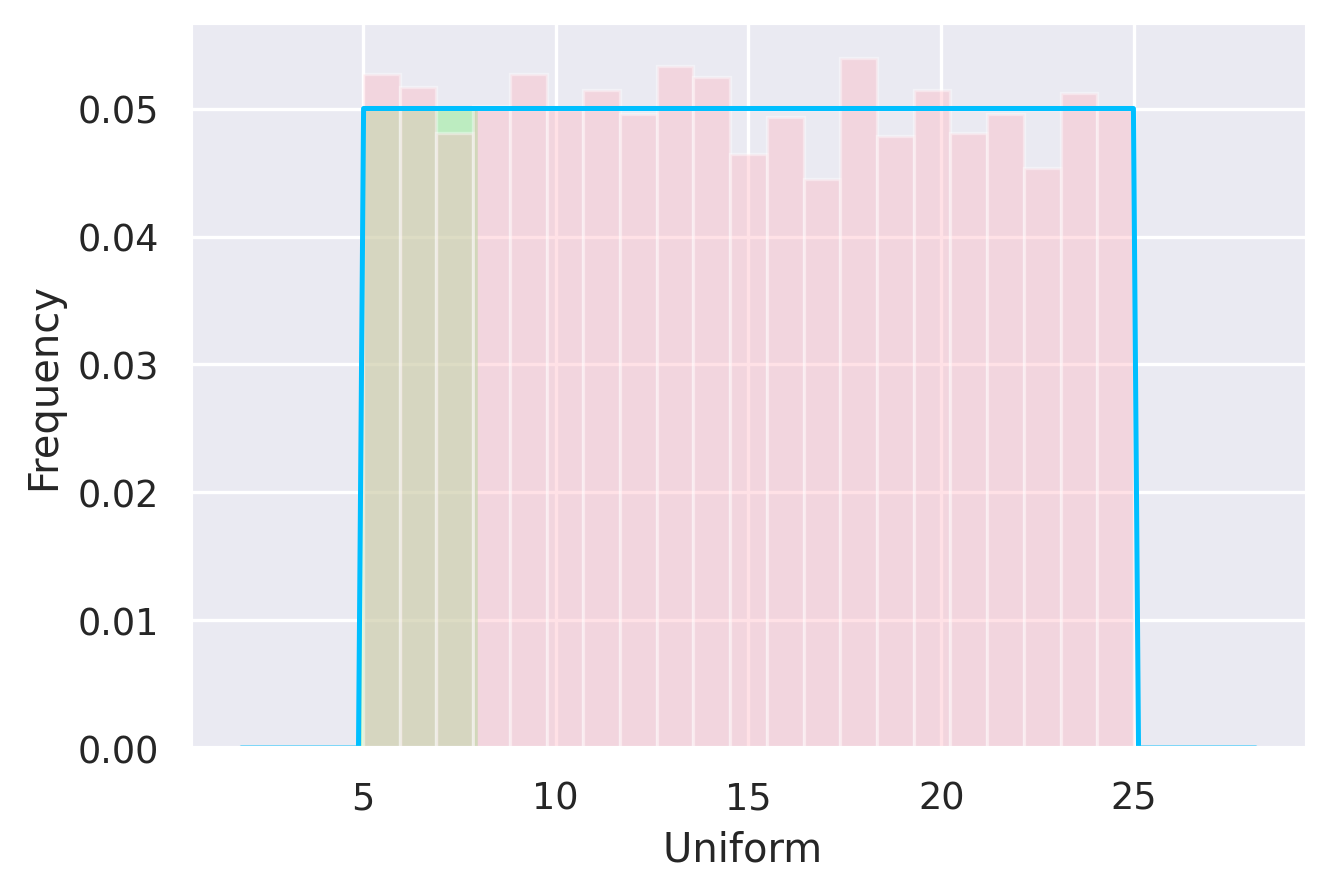

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
import matplotlib.pyplot as plt

# import seaborn: very important to easily plot histograms and density estimations
import seaborn as sns
sns.set(color_codes=True)
 
# import uniform distribution
from scipy import stats
from scipy.stats import uniform
# random numbers from uniform distribution
# Generate 10 numbers from 0 to 10
n = 5000
a = 5
b = 20

# create some synthetic data that folllows a uniform distribution
data_uniform = uniform.rvs(size=n, loc = a, scale=b)

# helping to display both the histogram and the underlying distribution
ax1 = sns.distplot(data_uniform,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.uniform,
                  fit_kws={"color":'deepskyblue'})
ax1.set(xlabel='Uniform ', ylabel='Frequency')
l1 = ax1.lines[0]

x = l1.get_xydata()[:,0]
y = l1.get_xydata()[:,1]
ax1.fill_between(x,y, where = x <= 8.0, color='lightgreen',alpha=0.5)
#plt.axvline(x=3, color='red')


In [ ]:
np.mean(data_uniform)
np.std(data_uniform)

2.9127642171245496

In [ ]:
# this is how we get the 40% percentile from the data
np.percentile(wt,40)

3.158

In [ ]:
from sklearn.preprocessing import QuantileTransformer
qt = QuantileTransformer(n_quantiles=100)
dat = qt.fit_transform(data_uniform.reshape(-1,1))
dat

array([[8.94357643e-01],
       [3.24667971e-01],
       [6.34857826e-01],
       ...,
       [5.12492529e-04],
       [6.87988094e-01],
       [3.69955257e-01]])

In [ ]:
from sklearn.datasets import load_diabetes

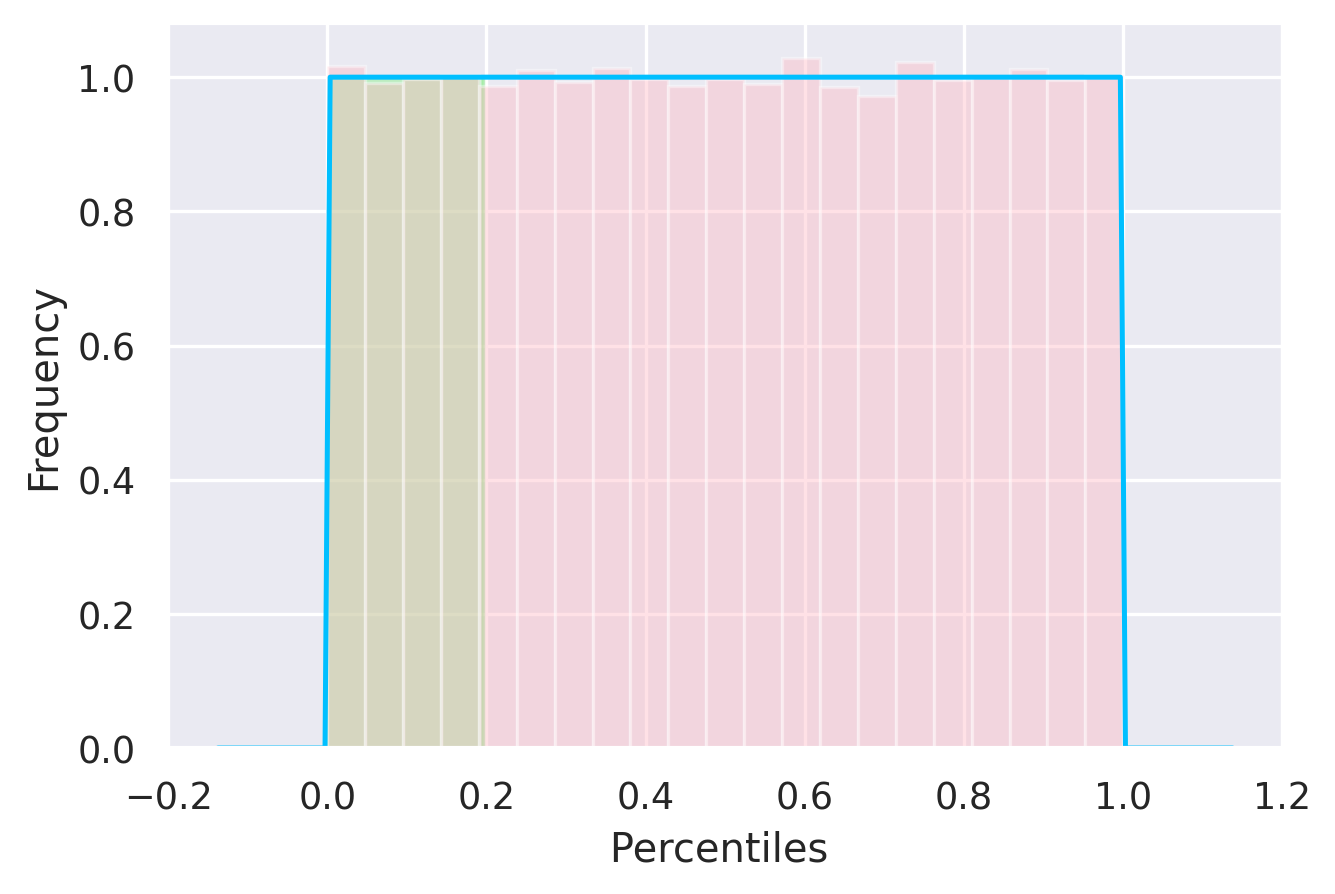

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 120
ax2 = sns.distplot(dat,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.uniform,
                  fit_kws={"color":'deepskyblue'})
ax2.set(xlabel='Percentiles ', ylabel='Frequency')
l2 = ax2.lines[0]

x = l2.get_xydata()[:,0]
y = l2.get_xydata()[:,1]
ax2.fill_between(x,y, where = x <= 0.2, color='lightgreen',alpha=0.5)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


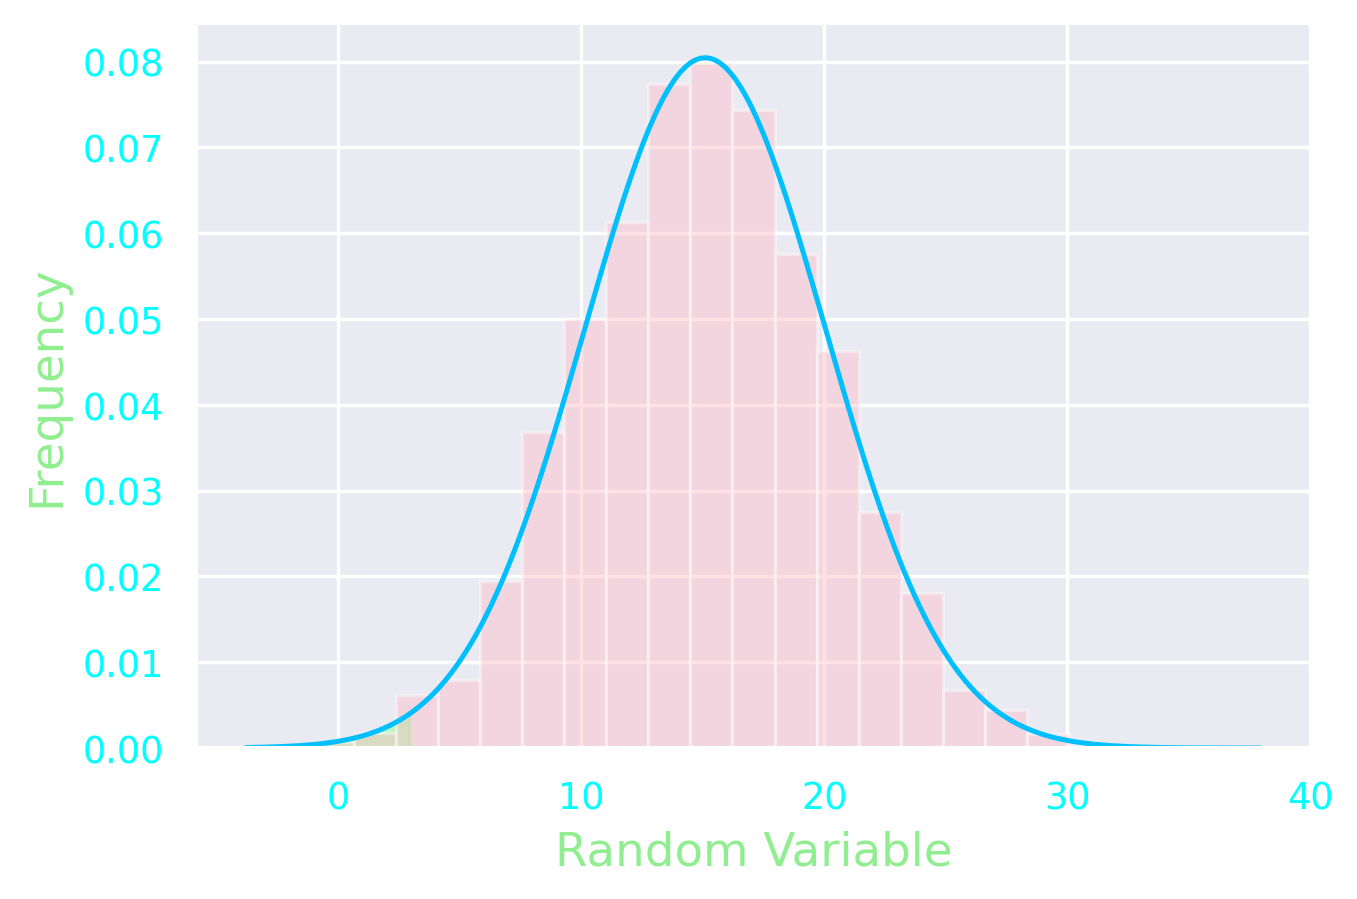

In [ ]:
from scipy.stats import norm
# generate random numbersfrom N(0,1)
plt.figure()
data_normal = norm.rvs(size=5000,loc=15,scale=5)
# then we want to display the histogram and the fit of the underlying distribution:
ax2 = sns.distplot(data_normal,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax2.set_xlabel('Random Variable',fontsize=14,color='lightgreen')
ax2.set_ylabel('Frequency',fontsize=14,color='lightgreen')
l2 = ax2.lines[0]

x = l2.get_xydata()[:,0]
y = l2.get_xydata()[:,1]
plt.tick_params(axis='x', colors='cyan')
plt.tick_params(axis='y', colors='cyan')
ax2.fill_between(x,y, where = x <= 3.0, color='palegreen',alpha=0.5)

### This is important for regression problems where we would want the residuals (a residual is the difference between ann observed and a predicted value) to be normally distributed.

In [ ]:
qtn = QuantileTransformer(n_quantiles=100)
dat_norm = qtn.fit_transform(data_normal.reshape(-1,1))
dat_norm

zdat_norm = (data_normal-np.mean(data_normal))/np.std(data_normal)

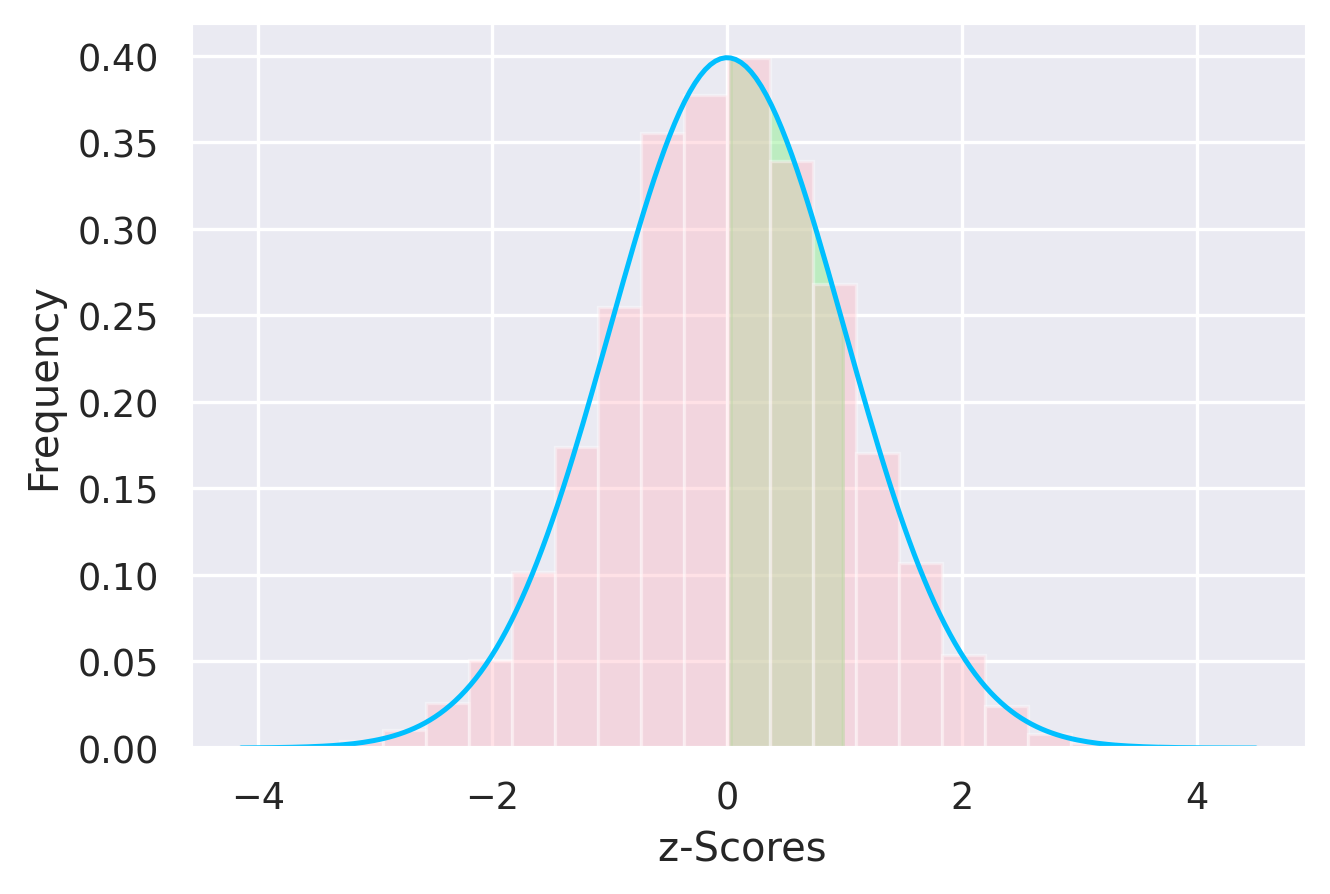

In [ ]:
ax3 = sns.distplot(zdat_norm,
                  bins=21,
                  kde=False,
                  color='deepskyblue',
                  hist_kws={"color":'lightpink'},
                  fit=stats.norm,
                  fit_kws={"color":'deepskyblue'})
ax3.set(xlabel='z-Scores ', ylabel='Frequency')
l3 = ax3.lines[0]

x = l3.get_xydata()[:,0]
y = l3.get_xydata()[:,1]
ax3.fill_between(x,y, where = (x >= 0) & (x<=1), color='lightgreen',alpha=0.5)

## <font color='navy'>Ordinary Least Squares Regression (Linear Regression)</font>

In the following example we learn how to write a code in Python for determining the line of best fit given one dependent variable and one *input* feature. That is to say we are going to determine a slope $m$ and an intercept $n$, the equation of the best fit line being $y=mx+n.$

We are going to analyze a real data set that was extracted from the 1974 *Motor Trend US* magazine and comprises fuel consumption and 10 aspects of automobile design and performance for 32 automobiles (1973-1974 models).

In [ ]:
# imports
import numpy as np
import pandas as pd

In [ ]:
from sklearn import linear_model

cars = pd.read_csv("drive/MyDrive/Colab Notebooks/mtcars.csv")
cars

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
8,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [ ]:
from sklearn.preprocessing import StandardScaler, QuantileTransformer

In [ ]:
scaler = StandardScaler()
scaler.fit(cars[['wt']])

StandardScaler(copy=True, with_mean=True, with_std=True)

In [ ]:
scaler.fit_transform(cars[['wt']])

array([[-0.62016658],
       [-0.35538219],
       [-0.93167763],
       [-0.00233633],
       [ 0.23129695],
       [ 0.25206436],
       [ 0.36628508],
       [-0.02829559],
       [-0.06983039],
       [ 0.23129695],
       [ 0.23129695],
       [ 0.88547016],
       [ 0.5324243 ],
       [ 0.58434281],
       [ 2.11074695],
       [ 2.29142336],
       [ 2.20939212],
       [-1.05628205],
       [-1.6637286 ],
       [-1.43528716],
       [-0.78111396],
       [ 0.31436657],
       [ 0.2261051 ],
       [ 0.64664502],
       [ 0.65183687],
       [-1.33145014],
       [-1.11858426],
       [-1.76964235],
       [-0.04906299],
       [-0.46441106],
       [ 0.36628508],
       [-0.45402735]])

In [ ]:
qtn = QuantileTransformer(n_quantiles=100)

In [ ]:
qtn.fit_transform(cars[['wt']])*100

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (100) is greater than the total number of samples (32). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([[ 25.80645161],
       [ 35.48387097],
       [ 19.35483871],
       [ 48.38709677],
       [ 58.06451613],
       [ 64.51612903],
       [ 72.58064516],
       [ 45.16129032],
       [ 38.70967742],
       [ 58.06451613],
       [ 58.06451613],
       [ 90.32258065],
       [ 77.41935484],
       [ 80.64516129],
       [ 93.5483871 ],
       [100.        ],
       [ 96.77419355],
       [ 16.12903226],
       [  3.22580645],
       [  6.4516129 ],
       [ 22.58064516],
       [ 67.74193548],
       [ 51.61290323],
       [ 83.87096774],
       [ 87.09677419],
       [  9.67741935],
       [ 12.90322581],
       [  0.        ],
       [ 41.93548387],
       [ 29.03225806],
       [ 72.58064516],
       [ 32.25806452]])

In [ ]:
np.argmax(qtn.fit_transform(cars[['wt']])*100)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (100) is greater than the total number of samples (32). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


15

The weight of the car is measured in 1000lbs to be the input and we want to create a linear model that predicts the average mileage *mpg* given the weight.

In [ ]:
v = cars[['wt']].values
v[np.argmin(qtn.fit_transform(cars[['wt']])*100)]

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (100) is greater than the total number of samples (32). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


array([1.513])

In [ ]:
x = cars[['wt']]
y = cars[['mpg']]
lm = linear_model.LinearRegression()
model = lm.fit(x,y)

In [ ]:
lm.predict([[2.0]])

array([[26.59618302]])

In [ ]:
lm.intercept_

array([37.28512617])

In [ ]:
lm.coef_

array([[-5.34447157]])

### What is the interpretation of the slope?

The expected drop (on average) in mpg when the weight increases by one unit.

In [ ]:
(x-np.mean(x))/np.std(x)

,wt
0,-0.620167
1,-0.355382
2,-0.931678
3,-0.002336
4,0.231297
5,0.252064
6,0.366285
7,-0.028296
8,-0.069830
9,0.231297


In [ ]:
# we can get the slope and the y-intercept

m = lm.coef_
n = lm.intercept_

print('The slope is:'+str(m))
print('The intercept is:'+str(n))

The slope is:[[-5.34447157]]
The intercept is:[37.28512617]


In [ ]:
xb = np.mean(x.values)
yb=np.mean(y.values)

Thus, the equation of the best fit line is $$y = mx + b.$$

<font color='red'> CRITICAL THINKING: How *exactly* are we obtaining the slope and the intercept?</font>

<font color='forestgreen'>ANSWER: One way to obtain the slope and the intercept is by applying the *Ordinary Least Squares* method.</font>

We determine the values of <font color='blue'>$m$</font> and <font color='red'>$b$</font> such that the sum of the square distances between the points and the line is *minimal*.</font>

<figure>
<center>
<img src='https://drive.google.com/uc?id=16s5RAyNsFB17nut3jJMqPsPxmbLC_wP2'
width='600px' />
<figcaption>Source: Simple Linear Regression (Tobias Roeschl)</figcaption></center>
</figure>


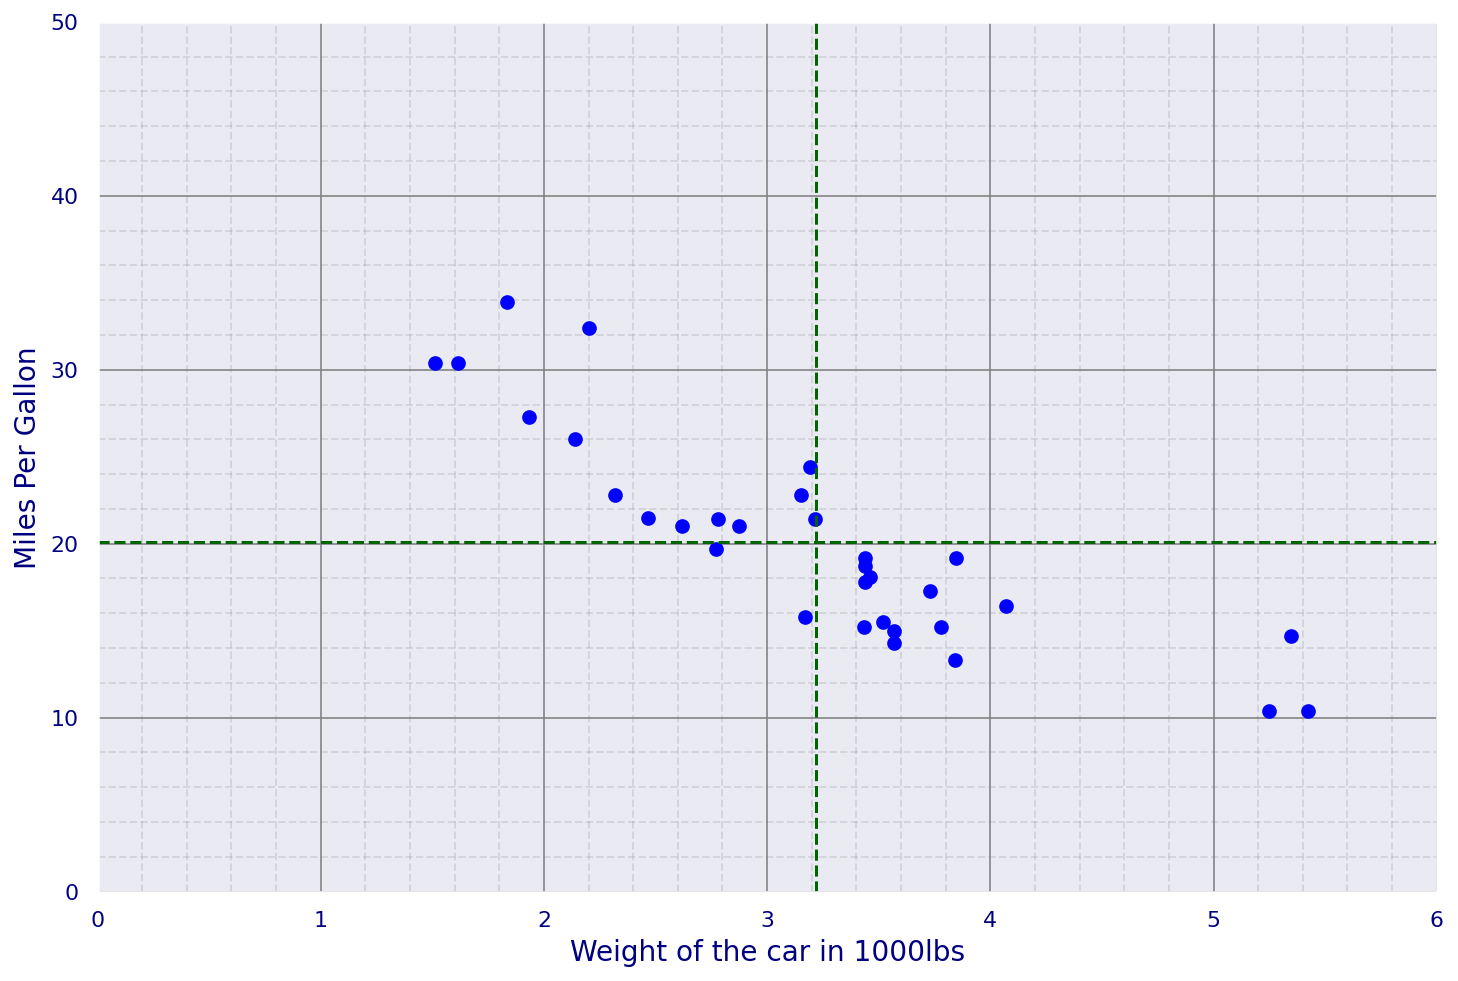

In [ ]:
import matplotlib.pyplot as plt
x_range = np.arange(np.max(x.values)+1)
yhat = lm.predict(x_range.reshape(-1,1))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(x,y,color='blue',s=40)
#ax.plot(x_range.reshape(-1,1), yhat, '-',color='red',lw=2.5)
ax.set_xlim(0, 6)
ax.set_ylim(0, 50)
ax.set_xlabel('Weight of the car in 1000lbs',fontsize=14,color='navy')
ax.set_ylabel('Miles Per Gallon',fontsize=14,color='navy')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.axvline(x=xb, color='darkgreen',linestyle='dashed')
plt.axhline(y=yb, color='darkgreen',linestyle='dashed')
plt.tick_params(axis='x', colors='navy')
plt.tick_params(axis='y', colors='navy')
ax.minorticks_on()
plt.show()

In [ ]:
np.mean(x)

wt    3.21725
dtype: float64

### CRITICAL THINKING: What is the interpretation of the line of best fit?

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x.values)
zx = scaler.transform(x.values)

scaler.fit(y.values)
zy = scaler.transform(y.values)

In [ ]:
zy = pd.DataFrame(zy)

In [ ]:
zy.columns=['zy']

In [ ]:
zx = (x - np.mean(x))/np.std(x)
zy = (y - np.mean(y))/np.std(y)

In [ ]:
model = lm.fit(zx,zy)

In [ ]:
model.intercept_

array([1.09961675e-15])

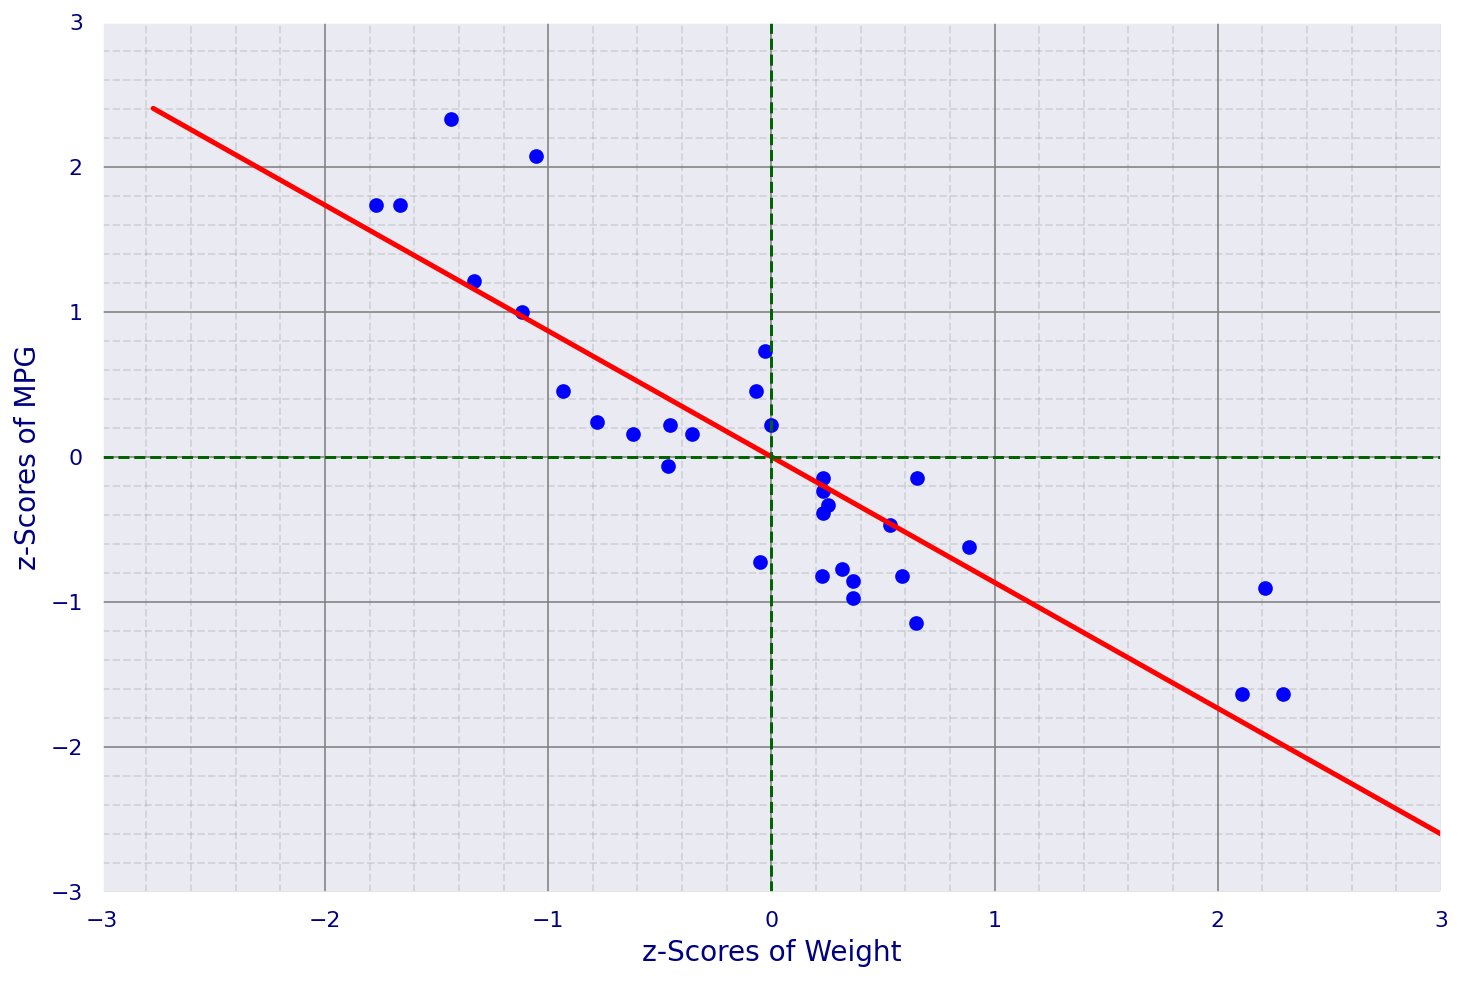

In [ ]:
zx_range = np.arange(np.min(zx.values)-1,np.max(zx.values)+1)
yhat = lm.predict(zx_range.reshape(-1,1))
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(zx,zy,color='blue',s=40)
ax.plot(zx_range.reshape(-1,1), yhat, '-',color='red',lw=2.5)
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_xlabel('z-Scores of Weight',fontsize=14,color='navy')
ax.set_ylabel('z-Scores of MPG',fontsize=14,color='navy')
ax.grid(b=True,which='major', color ='grey', linestyle='-', alpha=0.8)
ax.grid(b=True,which='minor', color ='grey', linestyle='--', alpha=0.2)
plt.axvline(x=xb, color='darkgreen')
plt.axhline(y=yb, color='darkgreen')
plt.tick_params(axis='x', colors='navy')
plt.tick_params(axis='y', colors='navy')
plt.axvline(x=0, color='darkgreen',linestyle='dashed')
plt.axhline(y=0, color='darkgreen',linestyle='dashed')
ax.minorticks_on()
plt.show()

In [ ]:
#hyperparamters
learning_rate = 0.01
initial_b = 0
initial_m = 0
num_iterations = 10000
data = np.concatenate((x.values,y.values),axis=1)

In [ ]:
data

array([[ 2.62 , 21.   ],
       [ 2.875, 21.   ],
       [ 2.32 , 22.8  ],
       [ 3.215, 21.4  ],
       [ 3.44 , 18.7  ],
       [ 3.46 , 18.1  ],
       [ 3.57 , 14.3  ],
       [ 3.19 , 24.4  ],
       [ 3.15 , 22.8  ],
       [ 3.44 , 19.2  ],
       [ 3.44 , 17.8  ],
       [ 4.07 , 16.4  ],
       [ 3.73 , 17.3  ],
       [ 3.78 , 15.2  ],
       [ 5.25 , 10.4  ],
       [ 5.424, 10.4  ],
       [ 5.345, 14.7  ],
       [ 2.2  , 32.4  ],
       [ 1.615, 30.4  ],
       [ 1.835, 33.9  ],
       [ 2.465, 21.5  ],
       [ 3.52 , 15.5  ],
       [ 3.435, 15.2  ],
       [ 3.84 , 13.3  ],
       [ 3.845, 19.2  ],
       [ 1.935, 27.3  ],
       [ 2.14 , 26.   ],
       [ 1.513, 30.4  ],
       [ 3.17 , 15.8  ],
       [ 2.77 , 19.7  ],
       [ 3.57 , 15.   ],
       [ 2.78 , 21.4  ]])

In [ ]:
def compute_cost(b, m, data):
    total_cost = 0
    
    # number of datapoints in training data
    N = float(len(data))
    
    # Compute sum of squared errors
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        total_cost += (y - (m * x + b)) ** 2
        
    # Return average of squared error
    return total_cost/(2*N)

In [ ]:
def step_gradient(b_current, m_current, data, alpha):
    """takes one step down towards the minima
    
    Args:
        b_current (float): current value of b
        m_current (float): current value of m
        data (np.array): array containing the training data (x,y)
        alpha (float): learning rate / step size
    
    Returns:
        tuple: (b,m) new values of b,m
    """
    
    m_gradient = 0
    b_gradient = 0
    N = float(len(data))

    # Calculate Gradient
    for i in range(0, len(data)):
        x = data[i, 0]
        y = data[i, 1]
        m_gradient += - (2/N) * x * (y - (m_current * x + b_current))
        b_gradient += - (2/N) * (y - (m_current * x + b_current))
    
    # Update current m and b
    m_updated = m_current - alpha * m_gradient
    b_updated = b_current - alpha * b_gradient

    #Return updated parameters
    return b_updated, m_updated

def gradient_descent(data, starting_b, starting_m, learning_rate, num_iterations):
    """runs gradient descent
    
    Args:
        data (np.array): training data, containing x,y
        starting_b (float): initial value of b (random)
        starting_m (float): initial value of m (random)
        learning_rate (float): hyperparameter to adjust the step size during descent
        num_iterations (int): hyperparameter, decides the number of iterations for which gradient descent would run
    
    Returns:
        list : the first and second item are b, m respectively at which the best fit curve is obtained, the third and fourth items are two lists, which store the value of b,m as gradient descent proceeded.
    """

    # initial values
    b = starting_b
    m = starting_m
    
    # to store the cost after each iteration
    cost_graph = []
    
    # to store the value of b -> bias unit, m-> slope of line after each iteration (pred = m*x + b)
    b_progress = []
    m_progress = []
    
    # For every iteration, optimize b, m and compute its cost
    for i in range(num_iterations):
        cost_graph.append(compute_cost(b, m, data))
        b, m = step_gradient(b, m, data, learning_rate)
        b_progress.append(b)
        m_progress.append(m)
        
    return [b, m, cost_graph,b_progress,m_progress]

In [ ]:
b, m, cost_graph,b_progress,m_progress = gradient_descent(data, initial_b, initial_m, learning_rate, num_iterations)

#Print optimized parameters
print ('Optimized b:', b)
print ('Optimized m:', m)

#Print error with optimized parameters
print ('Minimized cost:', compute_cost(b, m, data))

Optimized b: 37.285117303091454
Optimized m: -5.344469026915932
Minimized cost: 278.3219375435501


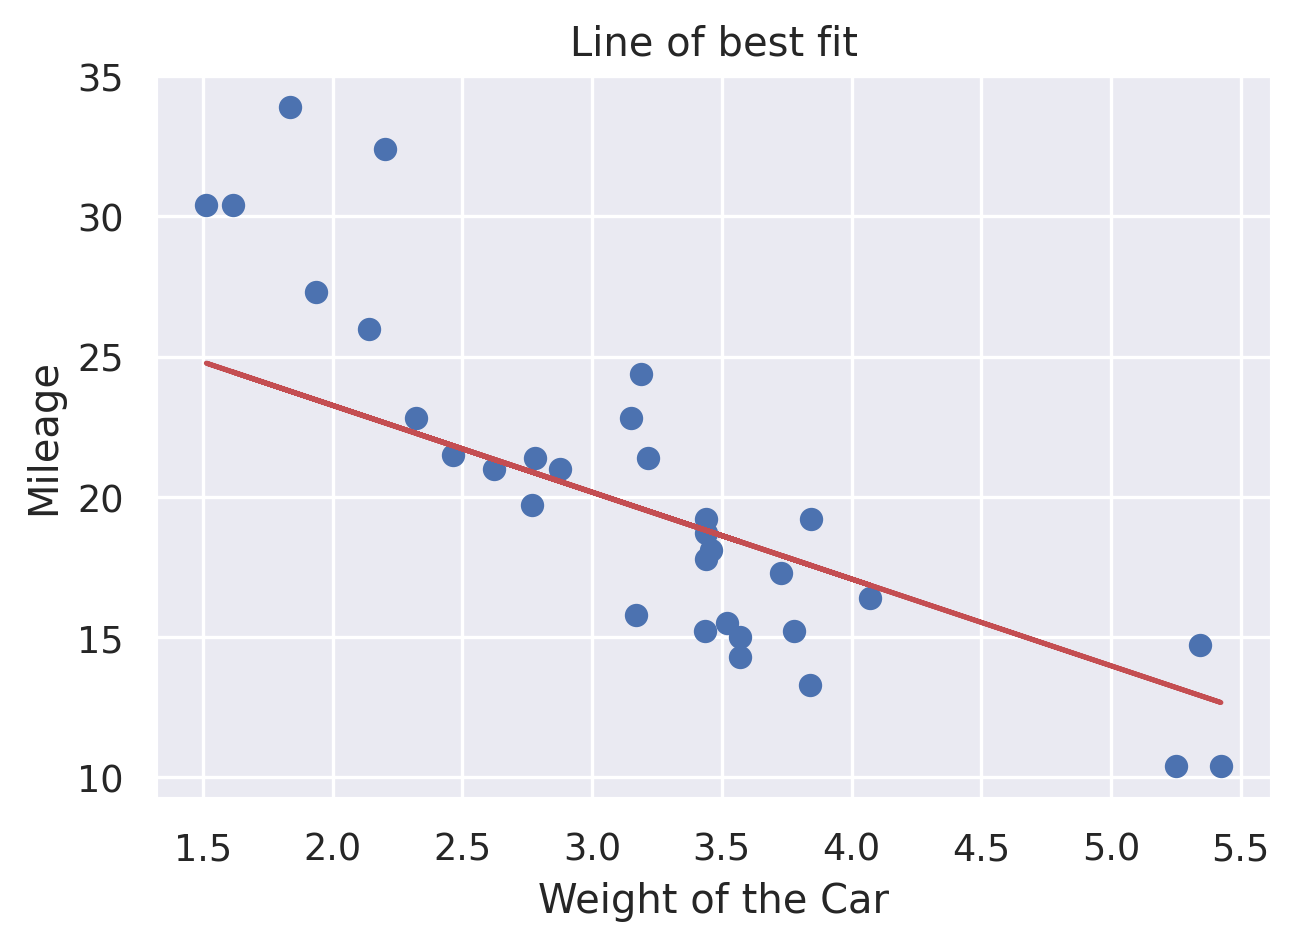

In [ ]:
#Plot dataset
plt.scatter(x, y)
#Predict y values
pred = m * x + b
#Plot predictions as line of best fit
plt.plot(x, pred, c='r')
plt.xlabel('Weight of the Car')
plt.ylabel('Mileage')
plt.title('Line of best fit')
plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
